<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml02_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST(Modified National Institute of Science and Technology) 데이터셋
* 손글씨 숫자(0, 1, 2, ..., 9) 데이터
* 분류 알고리즘을 테스트할 때 가장 많이 사용되는 데이터 셋
* 데이터 셋을 다운로드 후 구글 드라이브에 pickle 형태로 저장 (구글 드라이브 마운트 필요)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# MNIST 데이터 셋 다운로드(scikit-learn의 MNIST 예제 데이터 다운로드)
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [6]:
mnist.keys()  # dict의 key들의 리스트 (mnist 데이터 셋은 dict 형태의 데이터)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
mnist['DESCR']  # describe, description

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [9]:
X, y = mnist['data'], mnist['target']  # numpy.ndarray

In [10]:
X.shape  # 784(28x28) pixel 이미지 70,000개 데이터

(70000, 784)

In [11]:
X[0]  # 첫번째 이미지 샘플 픽셀 데이터(각 픽셀에는 0 ~ 255까지의 숫자들이 저장)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
y.shape

(70000,)

In [13]:
y[0]  #> 이미지의 레이블

'5'

In [14]:
y.dtype  # 문자열(str)

dtype('O')

In [2]:
# pickle 형태로 mnist 데이터 셋을 구글 드라이브에 저장.
import os
import pickle  # Python 기본 모듈 중 하나. 바이너리 데이터를 저장/복원.

In [3]:
dir_path = '/content/drive/My Drive/Colab Notebooks/lab_ml'
file_path = os.path.join(dir_path, 'mnist.pickle')
print(file_path)

/content/drive/My Drive/Colab Notebooks/lab_ml/mnist.pickle


In [24]:
with open(file_path, mode='wb') as f:  # 파일을 바이너리(b) 쓰기(w) 모드로 오픈.
    pickle.dump(mnist, f)  # mnist 데이터를 파일 f에 씀.

In [4]:
# pickle 형태로 저장된 데이터를 읽음.
with open(file_path, mode='rb') as f:
    mnist = pickle.load(f)

mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [5]:
X, y = mnist['data'], mnist['target'].astype(np.int16)  # 레이블을 숫자 타입으로 변환.

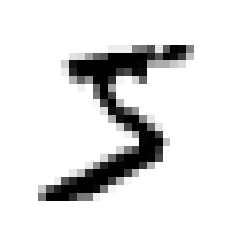

In [35]:
# 이미지 샘플을 그래프 출력
img = X[0].reshape((28, 28))  # X[0]: (784,) 1차원 배열 -> img: (28, 28) 2차원 배열
plt.imshow(img, cmap=plt.cm.binary)  # binary color map: 0-white, 255-black
plt.axis('off')  # 좌표축 제거
plt.show()

In [36]:
y[0]

5

In [6]:
def plot_digit(data):
    """data: (784,) shape의 1차원 ndarray.
    28x28 이미지로 변환 후 화면에 출력."""
    img = data.reshape((28, 28))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis('off')

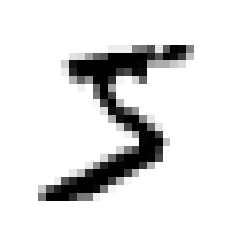

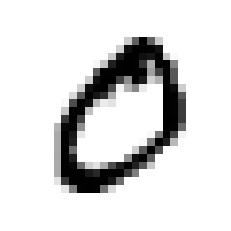

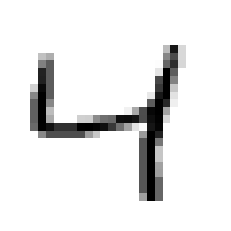

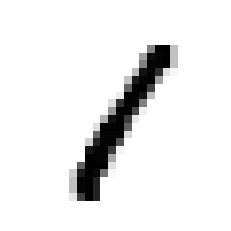

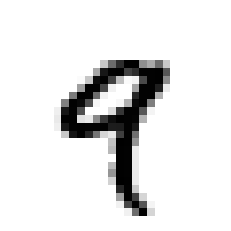

In [7]:
for data in X[:5]:
    plot_digit(data)
    plt.show()

In [8]:
for label in y[:5]:
    print(label)

5
0
4
1
9


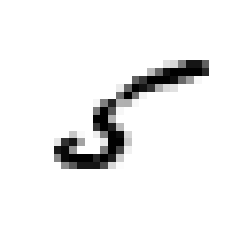

In [41]:
plot_digit(X[11])

In [42]:
y[11]

5

# 데이터 셋을 Train/Test 분리

In [44]:
y[:10], y[-10:]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int16),
 array([7, 8, 9, 0, 1, 2, 3, 4, 5, 6], dtype=int16))

In [9]:
# from sklearn.model_selection import train_test_split

n = 60_000  # 훈련 셋의 샘플 개수(테스트 셋의 샘플 개수 = 10_000)
X_train, y_train = X[:n], y[:n]  # 훈련 셋, 훈련 레이블
X_test, y_test = X[n:], y[n:]  # 테스트 셋, 테스트 레이블

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

# 이진 분류기(Binary Classifier)

In [14]:
# 숫자 이미지 샘플이 5인지 아닌지를 분류하는 이진 분류기
# -> 레이블을 True, False로 변경.
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
# 머신 러닝 모델(알고리즘) 선택
from sklearn.linear_model import SGDClassifier

In [12]:
# 모델 생성
sgd_clf = SGDClassifier(random_state=1)

In [15]:
# 모델 훈련
sgd_clf.fit(X=X_train, y=y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
# 예측
y_pred_5 = sgd_clf.predict(X=X_train)
y_pred_5

array([ True, False, False, ...,  True,  True, False])

In [17]:
# 평가(evalation) <- 평가 지표(metric)
# 정확도(accuracy): 전체 샘플들 중을 정확하게 분류한 비율.
accuracy = np.mean(y_train_5 == y_pred_5)  # 실제값 == 예측값
accuracy

0.9685333333333334

In [18]:
# confusion matrix(혼동 행렬, 오차 행렬)
from sklearn.metrics import confusion_matrix

In [19]:
conf_mat = confusion_matrix(y_true=y_train_5, y_pred=y_pred_5)
conf_mat

array([[53381,  1198],
       [  690,  4731]])

In [24]:
tn, fp = conf_mat[0, 0], conf_mat[0, 1]  # True Negative(진음성), False Positvie(가양성)
fn, tp = conf_mat[1, 0], conf_mat[1, 1]  # False Negative(가음성), True Positive(진양성)

In [25]:
# 정확도(accuracy): 샘플들을 정확하게 분류한 비율.
accuracy = (tn + tp) / (tn + fp + fn + tp)
accuracy

0.9685333333333334

In [70]:
# 정밀도(precision): 양성 예측의 정확도.
# 양성이라고 예측한 샘플들 중에서 정확하게 맞춘 비율.
precision = tp / (tp + fp)
precision

0.7979423174228369

In [71]:
# 재현율(recall): 실제 양성 샘플들 중에서 정확하게 맞춘 비율.
recall = tp / (tp + fn)
recall

0.8727172108467073

* 정밀도/재현율 트레이드오프(precsion/recall trade-off):
일반적으로, 정밀도가 높아지면 재현율이 낮아지고, 반대로 정밀도가 낮아지면 재현율이 높아짐.
* 재현율(recall) = 민감도(sensitivity) = TPR(True Positivt Rate)

In [72]:
# F1-score: 정밀도와 재현율의 조화 평균
f1 = 2 / (1/precision + 1/recall)
f1

0.8336563876651982

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_train_5, y_pred=y_pred_5)

0.9685333333333334

In [27]:
from sklearn.metrics import precision_score

precision_score(y_true=y_train_5, y_pred=y_pred_5)

0.7979423174228369

In [28]:
from sklearn.metrics import recall_score

recall_score(y_true=y_train_5, y_pred=y_pred_5)

0.8727172108467073

In [29]:
from sklearn.metrics import f1_score

f1_score(y_true=y_train_5, y_pred=y_pred_5)

0.8336563876651982

## 교차 검증(Cross Validation)

In [30]:
# 검증 점수(-MSE, accuracy)를 리턴.
from sklearn.model_selection import cross_val_score

In [35]:
cv_scores = cross_val_score(estimator=SGDClassifier(random_state=1),
                            X=X_train,
                            y=y_train_5,
                            scoring='accuracy',
                            cv=3)
cv_scores  # 정확도(accuracy)

array([0.95785, 0.9667 , 0.9608 ])

In [32]:
# 각 샘플들의 예측 값 또는 예측 값을 결정할 수 있는 점수/확률을 리턴.
from sklearn.model_selection import cross_val_predict

In [43]:
# 각 샘플들의 예측 값 - method='predict' (기본값)
cv_preds = cross_val_predict(estimator=SGDClassifier(random_state=1),
                             X=X_train,
                             y=y_train_5,
                             cv=3,
                             method='predict')
cv_preds

array([ True, False, False, ...,  True, False, False])

In [54]:
# 각 샘플들의 예측 값을 결정할 수 있는 점수 - method='decision_function'
cv_scores = cross_val_predict(estimator=SGDClassifier(random_state=1),
                              X=X_train,
                              y=y_train_5,
                              cv=3,
                              method='decision_function')
cv_scores
# 임계값(threshold): 결정 함수의 점수들을 Positive/Negative로 구분할 값.
# 임계값을 크게 하면, 정밀도(precision)이 높아지고 재현율(recall)이 낮아짐.
# 임계값을 작게 하면, 정밀도가 낮아지고 재현율이 높아짐.

array([  8536.87948485,  -9930.42427547, -34430.63925683, ...,
         6041.93526298,  -4785.17366605,  -8938.21271251])

## PR Curve(정밀도(precision) vs 재현율(recall) 곡선)

In [36]:
from sklearn.metrics import precision_recall_curve

In [55]:
precisions, recalls, thresholds = precision_recall_curve(y_true=y_train_5,
                                                         probas_pred=cv_scores)
precisions.shape, recalls.shape, thresholds.shape

((59586,), (59586,), (59585,))

In [50]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.grid(True)
    plt.xlabel('Threshold')
    plt.title('Precsion/Recall Trade-off')
    plt.legend()

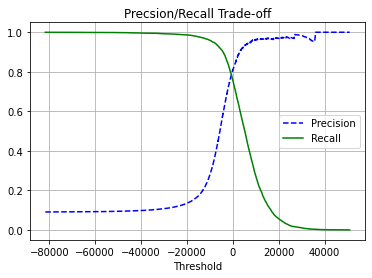

In [56]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# 정밀도/재현율 트레이드오프 그래프

In [52]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-')
    plt.grid(True)
    plt.title('Precision vs Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precsion')

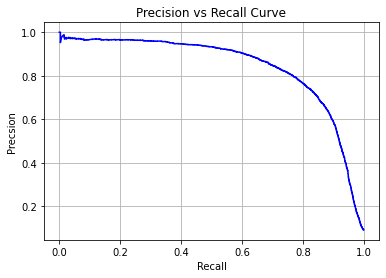

In [57]:
plot_precision_vs_recall(precisions, recalls)

## ROC(Receiver Operating Characteristic) Curve
* FPR(False Positive Rate, 가양성 비율)에 대한 TPR(True Positive Rate, 진양성 비율=재현율=민감도) 곡선
* TPR = TP / (FN + TP): 실제 양성 샘플들 중에서 양성을 정확히 맞춘 비율(정답률).
* TNR = TN / (TN + FP): 실제 음성 샘플들 중에서 음성을 정확히 맞춘 비율(정답률).
* FPR = FP / (TN + FP): 실제 음성 샘플들 중에서 오답률.
* TNR + FPR = 1 => FPR = 1 - TNR

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_true=y_train_5,
                                 y_score=cv_scores)
fpr.shape, tpr.shape, thresholds.shape

((3498,), (3498,), (3498,))

In [62]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, 'b-', linewidth=2)
    plt.title('ROC Curve')
    plt.xlabel('FPR = 1 - TNR')
    plt.ylabel('TPR, Recall, Sensitivity')
    plt.grid(True)

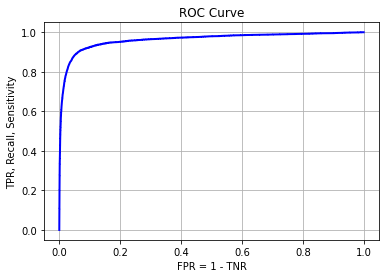

In [63]:
plot_roc_curve(fpr, tpr)
#> 양성 샘플의 정답률(TPR)이 증가하면(재현율이 증가하면), FPR이 증가. 
#  즉, TNR(음성 샘플의 정답률)이 감소.
# 재현율(민감도)와 음성 샘플 정답률은 서로 Trade-off 관계.

In [65]:
# AUC(Area Under the Curve): ROC 곡선의 아래쪽 넓이.
# 좋은 분류 모델(알고리즘)은 AUC가 1에 가까운 모델.
from sklearn.metrics import roc_auc_score

In [66]:
auc = roc_auc_score(y_true=y_train_5, y_score=cv_scores)
auc

0.962647024223004

* PR 곡선 vs ROC 곡선 선택?
    * 양성 클래스가 드물때 -> PR 곡선으로 모델 평가
    * FN(가음성)보다 FP(가양성)이 중요할 때 -> PR 곡선으로 모델 평가
    * 그 이외에는 일반적으로 ROC 곡선으로 모델 평가
* 5와 5가 아닌 숫자를 분류하는 이진 분류 문제는 양성 클래스가 매우 적은 샘플.
* ROC 곡선은 성능이 좋은 것처럼 보이지만, PR은 개선 여부가 더 있는 것처럼 보임.


In [67]:
from sklearn.ensemble import RandomForestClassifier

* RandomForestClassifier 모델 생성
* 모델 훈련(fit) - 이진 분류(binary classification)
* 훈련된 모델로 예측(predict)
* 평가 지표: 정확도, 정밀도, 재현율
* 교차 검증(Cross Validation)을 사용해서 ROC 곡선 그리기
* 교차 검증(Cross Validation)을 사용해서 PR 곡선 그리기
    * 힌트: method='predict_proba'

In [68]:
forest_clf = RandomForestClassifier(random_state=1)

In [69]:
cv_probs = cross_val_predict(estimator=forest_clf,
                             X=X_train,
                             y=y_train_5,
                             cv=3,
                             method='predict_proba')
cv_probs  # [[5가 아닐(False)확률, 5일(True) 확률]]

array([[0.07, 0.93],
       [0.98, 0.02],
       [0.96, 0.04],
       ...,
       [0.  , 1.  ],
       [0.92, 0.08],
       [0.94, 0.06]])